In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import keras
from keras.layers import Dense
from keras.models import Sequential
import warnings
warnings.filterwarnings("ignore")

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Boston.csv to Boston.csv


In [5]:
# Load the dataset
data = pd.read_csv('Boston.csv')

In [6]:
# Display the first few rows of the dataset
print(data.head())

   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2  


In [7]:
# Display the shape of the dataset
print(data.shape)

(506, 15)


In [8]:
# Display the data types of each column
print(data.dtypes)

Unnamed: 0      int64
crim          float64
zn            float64
indus         float64
chas            int64
nox           float64
rm            float64
age           float64
dis           float64
rad             int64
tax             int64
ptratio       float64
black         float64
lstat         float64
medv          float64
dtype: object


In [9]:
# Check for missing values
print(data.isnull().sum())

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64


In [10]:
# Display summary statistics of the dataset
print(data.describe())

       Unnamed: 0        crim          zn       indus        chas         nox  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   253.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      1.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    127.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    253.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    379.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    506.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               rm         age         dis         rad         tax     ptratio  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
std      0.702617   28.1488

Unnamed: 0   -0.226604
crim         -0.388305
zn            0.360445
indus        -0.483725
chas          0.175260
nox          -0.427321
rm            0.695360
age          -0.376955
dis           0.249929
rad          -0.381626
tax          -0.468536
ptratio      -0.507787
black         0.333461
lstat        -0.737663
medv          1.000000
Name: medv, dtype: float64


<Axes: >

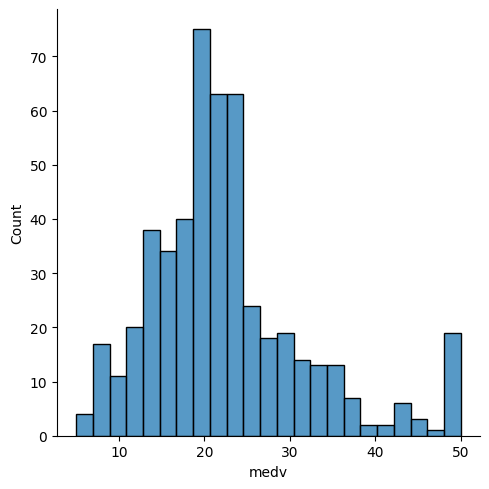

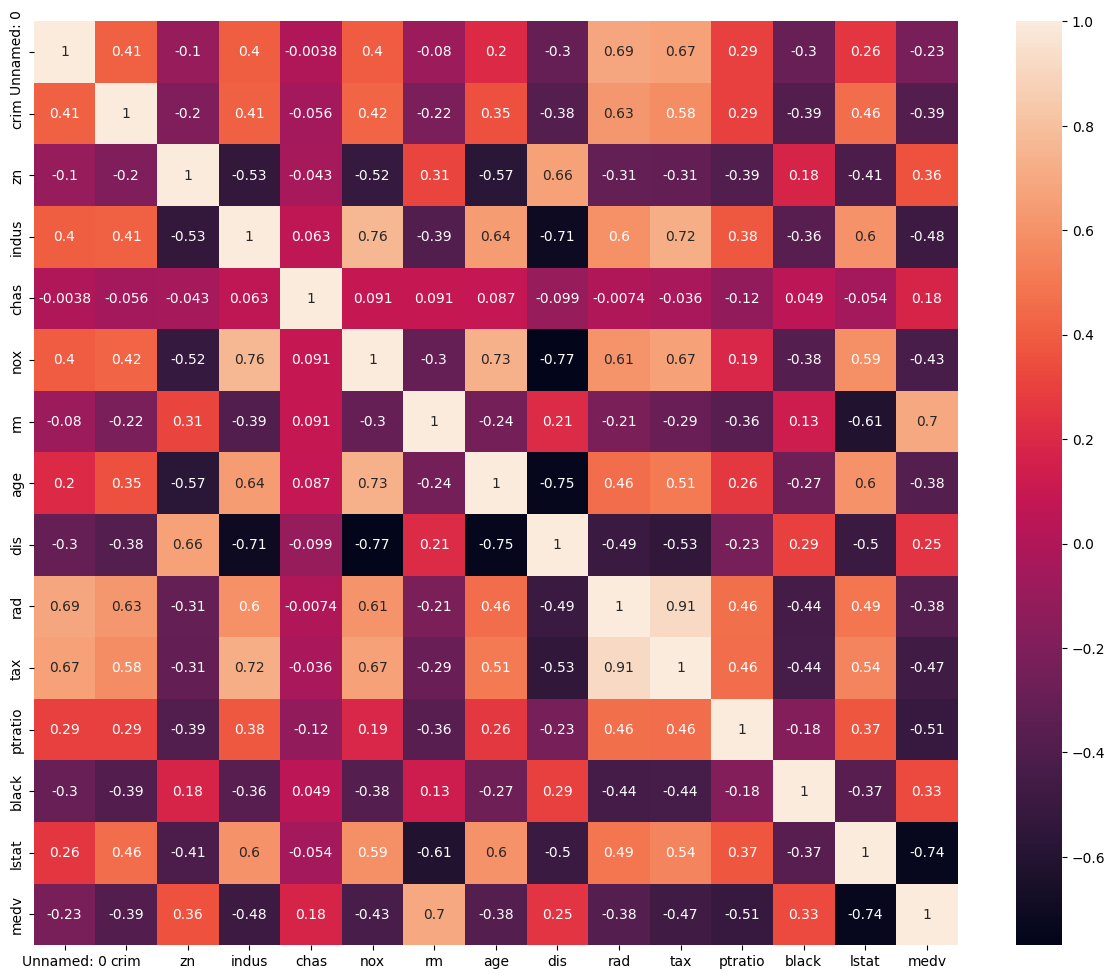

In [11]:
# Data Visualization
sns.displot(data['medv'])

correlation = data.corr()
print(correlation['medv'])

fig, axes = plt.subplots(figsize=(15, 12))
sns.heatmap(correlation, square=True, annot=True)

In [13]:
# Splitting Data into testing and training data
X = data.drop('medv', axis=1)  # Replace 'PRICE' with 'medv'
y = data['medv']  # Replace 'PRICE' with 'medv'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


In [14]:
# Normalizing the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
# Model Building
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=14))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1920      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12801 (50.00 KB)
Trainable params: 12801 (50.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
print(X_train.shape)
print(X_train.shape[1])

(404, 14)
14


In [17]:
# Fitting the data to the model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 2s 3ms/step - loss: 581.1435
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 548.7274
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 491.7525
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 361.3808
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 155.1299
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 63.9252
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 40.6912
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 29.9699
Epoch 9/100
13/13 [==============================] - 0s 5ms/step - loss: 24.5533
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 21.6990
Epoch 11/100
13/13 [==============================] - 0s 4ms/step - loss: 19.9200
Epoch 12/100
13/13 [==============================] - 0s 4ms/step - loss: 18.6603
Epoch 13/100
13/13 [

In [18]:
# Evaluating the model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("R2 Score = ", r2)
print("RMSE Score = ", rmse)

4/4 [==============================] - 0s 6ms/step
R2 Score =  0.8978385663364401
RMSE Score =  3.080535072052071
